In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [3]:
import sys
sys.path.append("../src")

from snowflake_client import get_engine

engine = get_engine()


In [4]:
df_daily = pd.read_sql(
    "SELECT * FROM daily_business_kpis ORDER BY order_date",
    engine
)

df_growth = pd.read_sql(
    "SELECT * FROM weekly_growth_kpis ORDER BY week_start",
    engine
)

df_customer = pd.read_sql(
    "SELECT * FROM customer_new_vs_returning ORDER BY order_date",
    engine
)

df_payment = pd.read_sql(
    "SELECT * FROM revenue_by_payment_type",
    engine
)


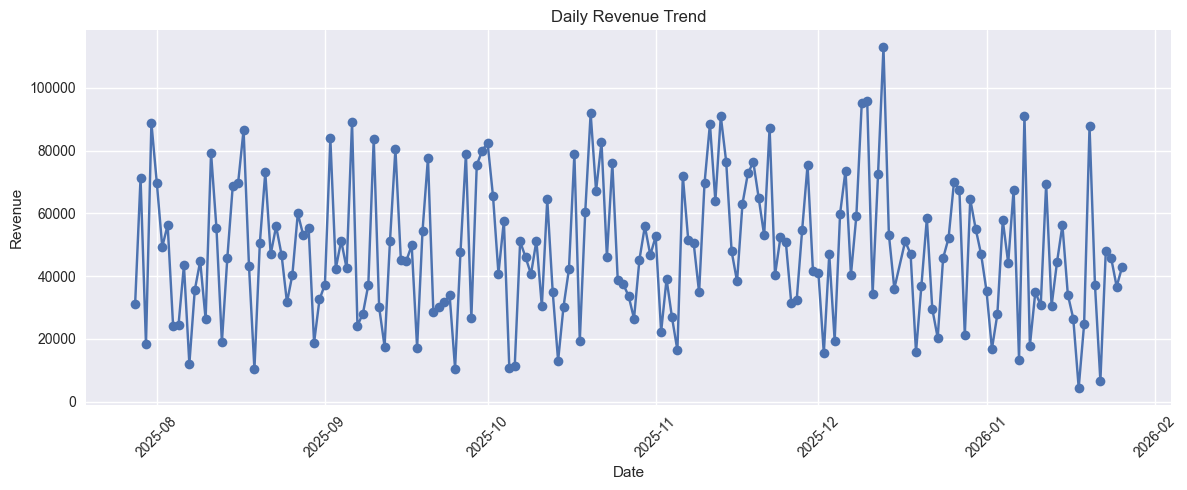

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df_daily["order_date"], df_daily["total_revenue"], marker="o")
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


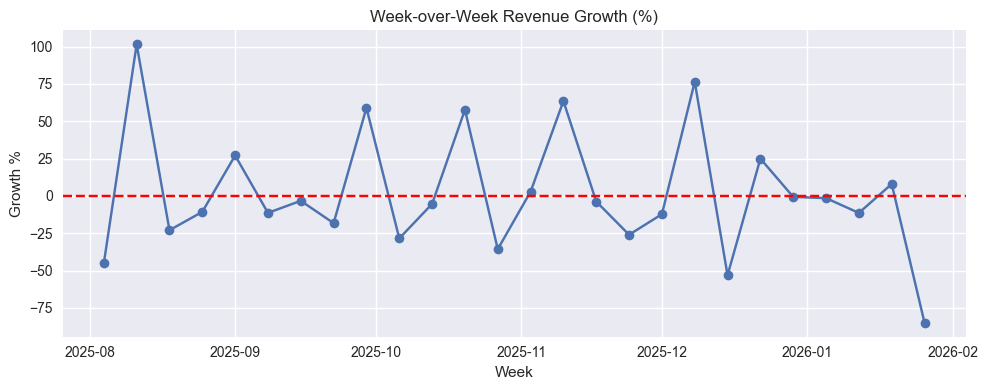

In [7]:
plt.figure(figsize=(10,4))
plt.plot(
    df_growth["week_start"],
    df_growth["wow_growth_pct"],
    marker="o"
)
plt.axhline(0, color="red", linestyle="--")
plt.title("Week-over-Week Revenue Growth (%)")
plt.xlabel("Week")
plt.ylabel("Growth %")
plt.tight_layout()
plt.show()


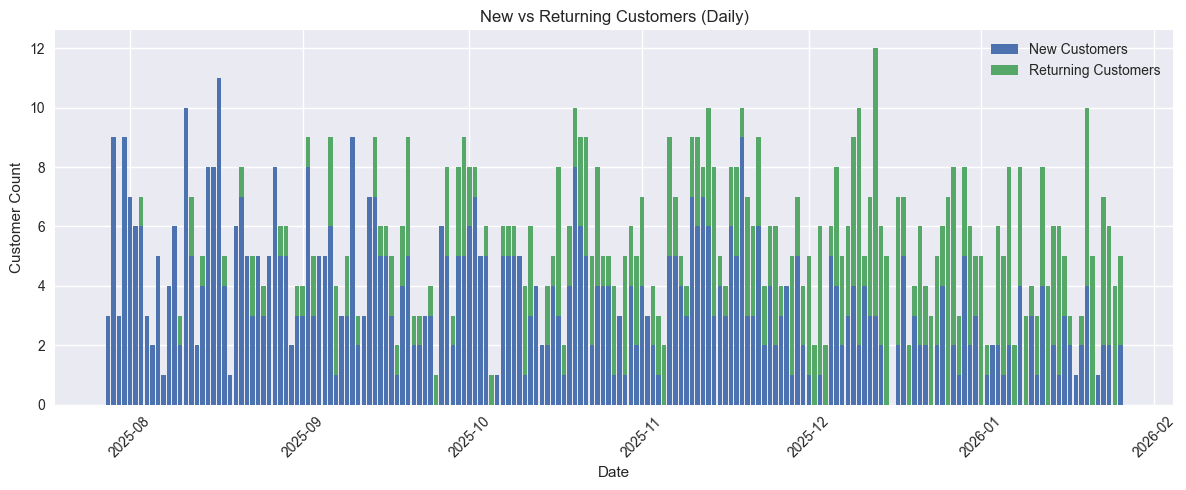

In [8]:
plt.figure(figsize=(12,5))

plt.bar(
    df_customer["order_date"],
    df_customer["new_customers"],
    label="New Customers"
)

plt.bar(
    df_customer["order_date"],
    df_customer["returning_customers"],
    bottom=df_customer["new_customers"],
    label="Returning Customers"
)

plt.title("New vs Returning Customers (Daily)")
plt.xlabel("Date")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


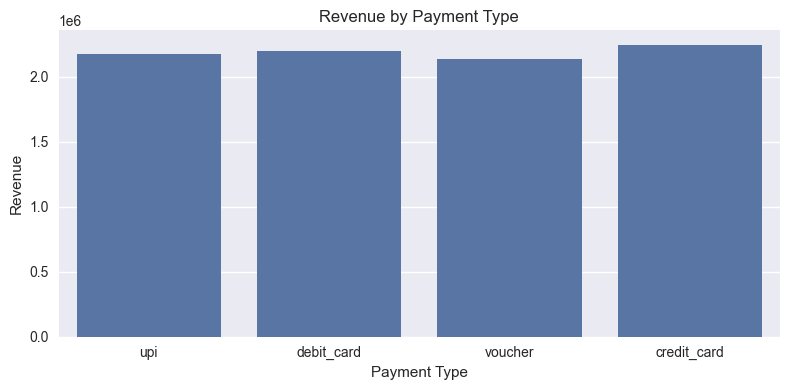

In [9]:
plt.figure(figsize=(8,4))
sns.barplot(
    x="payment_type",
    y="total_revenue",
    data=df_payment
)
plt.title("Revenue by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


In [10]:
latest = df_daily.iloc[-1]

print("📊 Latest Business Snapshot")
print("----------------------------")
print(f"Date: {latest['order_date']}")
print(f"Total Revenue: {latest['total_revenue']}")
print(f"Total Orders: {latest['total_orders']}")
print(f"Active Customers: {latest['active_customers']}")
print(f"AOV: {latest['avg_order_value']}")


📊 Latest Business Snapshot
----------------------------
Date: 2026-01-26
Total Revenue: 42859.42
Total Orders: 5
Active Customers: 5
AOV: 8571.88


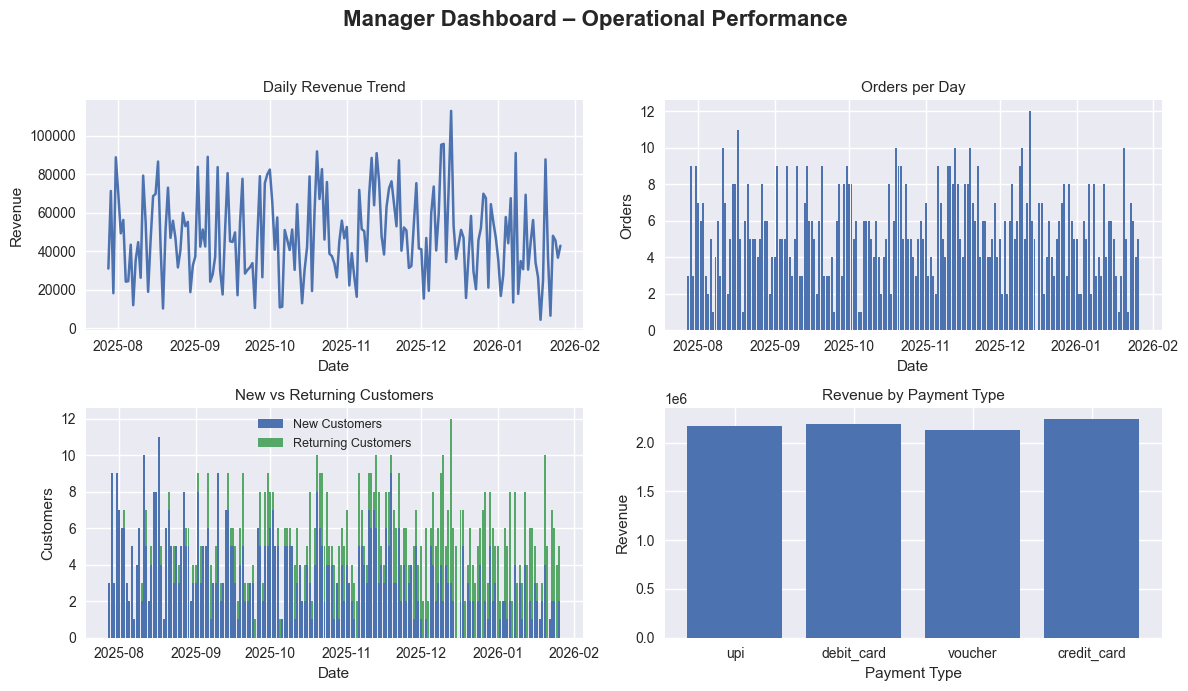

In [12]:
from datetime import datetime
import matplotlib.pyplot as plt

# ---------------------------
# Create dashboard layout
# ---------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle(
    "Manager Dashboard – Operational Performance",
    fontsize=16,
    fontweight="bold"
)

# ---------------------------
# 1️⃣ Daily Revenue Trend (LINE)
# ---------------------------
axes[0,0].plot(
    df_daily["order_date"],
    df_daily["total_revenue"],
    linewidth=1.8
)
axes[0,0].set_title("Daily Revenue Trend", fontsize=11)
axes[0,0].set_xlabel("Date")
axes[0,0].set_ylabel("Revenue")

# ---------------------------
# 2️⃣ Orders per Day (BAR)
# ---------------------------
axes[0,1].bar(
    df_daily["order_date"],
    df_daily["total_orders"]
)
axes[0,1].set_title("Orders per Day", fontsize=11)
axes[0,1].set_xlabel("Date")
axes[0,1].set_ylabel("Orders")

# ---------------------------
# 3️⃣ New vs Returning Customers (STACKED BAR)
# ---------------------------
axes[1,0].bar(
    df_customer["order_date"],
    df_customer["new_customers"],
    label="New Customers"
)

axes[1,0].bar(
    df_customer["order_date"],
    df_customer["returning_customers"],
    bottom=df_customer["new_customers"],
    label="Returning Customers"
)

axes[1,0].set_title("New vs Returning Customers", fontsize=11)
axes[1,0].set_xlabel("Date")
axes[1,0].set_ylabel("Customers")
axes[1,0].legend(fontsize=9)

# ---------------------------
# 4️⃣ Revenue by Payment Type (BAR)
# ---------------------------
axes[1,1].bar(
    df_payment["payment_type"],
    df_payment["total_revenue"]
)
axes[1,1].set_title("Revenue by Payment Type", fontsize=11)
axes[1,1].set_xlabel("Payment Type")
axes[1,1].set_ylabel("Revenue")

# ---------------------------
# Layout polish
# ---------------------------
plt.tight_layout(rect=[0, 0, 1, 0.95])

# ---------------------------
# SAVE IMAGE (IMPORTANT)
# ---------------------------
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
output_path = f"../reports/images/manager_dashboard_{timestamp}.png"

fig.savefig(
    output_path,
    dpi=200,
    bbox_inches="tight"
)

# ---------------------------
# Display dashboard
# ---------------------------
plt.show()


In [13]:
engine.dispose()
